<a href="https://colab.research.google.com/github/LGChalla/Laxmigayathri_INFO5731_Spring2025/blob/main/Challa_Laxmigayathri_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [46]:
# Write your code here
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
import pandas as pd
file_path = '/content/drive/MyDrive/cleaned_amazon_reviews.csv'
df = pd.read_csv(file_path)

In [48]:
from collections import Counter
from nltk.tokenize import word_tokenize
import nltk
from nltk.util import ngrams
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')
from nltk.corpus import stopwords
from nltk import pos_tag
import re
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package s

True

In [52]:
reviews = df['cleaned_text'].astype(str).tolist()

# (1) Count the frequency of all the N-grams (N=3) and (N=2)
bigram_counter = Counter()
trigram_counter = Counter()
noun_phrase_counter = Counter()
noun_phrase_per_review = []

# Process all reviews
for review in reviews:
    tokens = word_tokenize(re.sub(r'[^a-zA-Z0-9\s]', '', review.lower()))
    tokens = [word for word in tokens if word not in stopwords.words('english')]

    bigram_counter.update(ngrams(tokens, 2))  # Extract bigrams
    trigram_counter.update(ngrams(tokens, 3))  # Extract trigrams
print("\nBigram Counts:", bigram_counter.most_common(10))
print("\nTrigram Counts:", trigram_counter.most_common(10))


Bigram Counts: [(('bubbl', 'bath'), 300), (('love', 'fact'), 100), (('fact', 'fragranc'), 100), (('fragranc', 'free'), 100), (('free', 'doesnt'), 100), (('doesnt', 'dri'), 100), (('dri', 'skin'), 100), (('time', 'classic'), 100), (('mr', 'bubbl'), 100), (('bubbl', 'realli'), 100)]

Trigram Counts: [(('love', 'fact', 'fragranc'), 100), (('fact', 'fragranc', 'free'), 100), (('fragranc', 'free', 'doesnt'), 100), (('free', 'doesnt', 'dri'), 100), (('doesnt', 'dri', 'skin'), 100), (('mr', 'bubbl', 'realli'), 100), (('bubbl', 'realli', 'help'), 100), (('realli', 'help', 'reduc'), 100), (('help', 'reduc', 'dryness'), 100), (('reduc', 'dryness', 'skin'), 100)]


In [53]:
# (2) Calculate the probabilities for all the bigrams in the dataset
unigram_counter = Counter([word for review in reviews for word in word_tokenize(re.sub(r'[^a-zA-Z0-9\s]', '', review.lower()))])
bigram_probs = {bigram: count / unigram_counter[bigram[0]] for bigram, count in bigram_counter.items() if bigram[0] in unigram_counter}
print("\nBigram Probabilities:", list(bigram_probs.items())[:10])


Bigram Probabilities: [(('love', 'fact'), 0.2), (('fact', 'fragranc'), 1.0), (('fragranc', 'free'), 1.0), (('free', 'doesnt'), 0.5), (('doesnt', 'dri'), 0.5), (('dri', 'skin'), 1.0), (('time', 'classic'), 1.0), (('mr', 'bubbl'), 1.0), (('bubbl', 'realli'), 0.125), (('realli', 'help'), 1.0)]


In [54]:
# (3) Extract all the noun phrases and calculate their relative probabilities
for review in reviews:
    tokens = word_tokenize(re.sub(r'[^a-zA-Z0-9\s]', '', review.lower()))
    tokens = [word for word in tokens if word not in stopwords.words('english')]

    tagged = pos_tag(tokens)
    noun_phrases = [' '.join(word for word, tag in tagged if tag in ['NN', 'NNS', 'NNP', 'NNPS'])]
    noun_phrase_counter.update(noun_phrases)
    noun_phrase_per_review.append(Counter(noun_phrases))

# Compute relative noun phrase probabilities
max_freq = max(noun_phrase_counter.values()) if noun_phrase_counter else 1
noun_phrase_probs = {np: count / max_freq for np, count in noun_phrase_counter.items()}

# Convert to DataFrame for table format
noun_phrases_list = list(noun_phrase_counter.keys())
data = []
for review_nps in noun_phrase_per_review:
    row = [review_nps.get(np, 0) / max_freq for np in noun_phrases_list]
    data.append(row)

df_noun_phrases = pd.DataFrame(data, columns=noun_phrases_list)
print("\nNoun Phrase Probabilities:")
print(df_noun_phrases.head(10))


Noun Phrase Probabilities:
   fact doesnt dri skin   gift   time  \
0                 0.005  0.000  0.000   
1                 0.000  0.005  0.000   
2                 0.000  0.000  0.005   
3                 0.000  0.000  0.000   
4                 0.000  0.000  0.000   
5                 0.000  0.000  0.000   
6                 0.000  0.000  0.000   
7                 0.000  0.000  0.000   
8                 0.000  0.000  0.000   
9                 0.000  0.000  0.000   

   mr bubbl realli help skin cold winter isnt child doesnt bubbl softer skin recommend  \
0                                              0.000                                     
1                                              0.000                                     
2                                              0.000                                     
3                                              0.005                                     
4                                              0.000                  

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [55]:
import math
from collections import Counter
import pandas as pd
documents = df['cleaned_text'].dropna().astype(str).tolist()

In [56]:
# (1) Compute Term Frequency (TF)
def compute_tf(doc_tokens):
    word_count = Counter(doc_tokens)
    total_words = len(doc_tokens)
    return {word: count / total_words for word, count in word_count.items()}

tokenized_docs = [doc.lower().split() for doc in documents]
tf_values = [compute_tf(doc) for doc in tokenized_docs]


In [57]:
# (2) Compute Inverse Document Frequency (IDF)
def compute_idf(tokenized_docs):
    N = len(tokenized_docs)
    all_words = set(word for doc in tokenized_docs for word in doc)
    idf_values = {}
    for word in all_words:
        doc_freq = sum(1 for doc in tokenized_docs if word in doc)
        idf_values[word] = math.log(N / doc_freq) if doc_freq else 0
    return idf_values

idf_values = compute_idf(tokenized_docs)


In [58]:
# (3) Compute TF-IDF Matrix
tfidf_matrix = []
for tf in tf_values:
    tfidf_vector = {word: tf[word] * idf_values[word] for word in tf.keys()}
    tfidf_matrix.append(tfidf_vector)

tfidf_df = pd.DataFrame(tfidf_matrix).fillna(0)


In [59]:
# (4) Compute Cosine Similarity
def cosine_similarity(vec1, vec2):
    dot_product = sum(vec1[word] * vec2.get(word, 0) for word in vec1)
    norm1 = math.sqrt(sum(val ** 2 for val in vec1.values()))
    norm2 = math.sqrt(sum(val ** 2 for val in vec2.values()))
    return dot_product / (norm1 * norm2) if norm1 and norm2 else 0

# Query relevant to the dataset
query = "A gentle bubble bath with a soothing fragrance and great for sensitive skin"
query_tokens = query.lower().split()
query_tf = compute_tf(query_tokens)
query_tfidf = {word: query_tf.get(word, 0) * idf_values.get(word, 0) for word in query_tokens}

# Rank documents based on similarity to the query
similarities = [(i, cosine_similarity(query_tfidf, tfidf_matrix[i])) for i in range(len(documents))]
similarities.sort(key=lambda x: x[1], reverse=True)

doc_ranking = pd.DataFrame(similarities, columns=["Document Index", "Cosine Similarity"])

# Print results
print("\nTF-IDF Matrix:")
print(tfidf_df.head(10))
print("\nRanked Documents:")
print(doc_ranking.head(10))



TF-IDF Matrix:
       love      fact  fragranc      free    doesnt       dri      skin  \
0  0.136502  0.366421  0.366421  0.267400  0.267400  0.366421  0.209477   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3  0.000000  0.000000  0.000000  0.000000  0.110106  0.000000  0.172510   
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5  0.086865  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6  0.043432  0.000000  0.000000  0.085082  0.000000  0.000000  0.000000   
7  0.106168  0.000000  0.000000  0.000000  0.000000  0.000000  0.162926   
8  0.086865  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

       gift      time   classic  ...      peor    compra       que      hice  \
0  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000  

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the word embedding model you created. (PCA and T-sne)

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [60]:
import pandas as pd
import gensim
from gensim.models import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.spatial.distance import cosine

In [61]:
# (1) Train a 300-dimension word embedding model
model = Word2Vec(sentences=tokenized_docs, vector_size=300, window=5, min_count=1, workers=8, sg=1)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24403 (\N{CJK UNIFIED IDEOGRAPH-5F53}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12394 (\N{HIRAGANA LETTER NA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12461 (\N{KATAKANA LETTER KI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, 

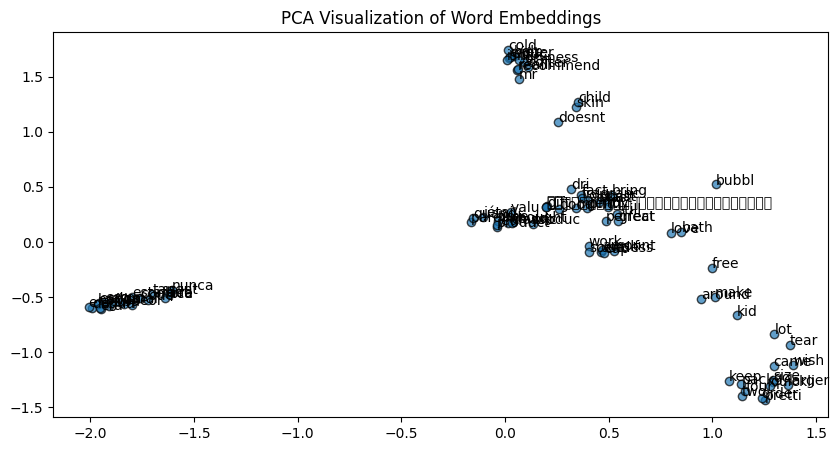

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24403 (\N{CJK UNIFIED IDEOGRAPH-5F53}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12394 (\N{HIRAGANA LETTER NA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12461 (\N{KATAKANA LETTER KI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, 

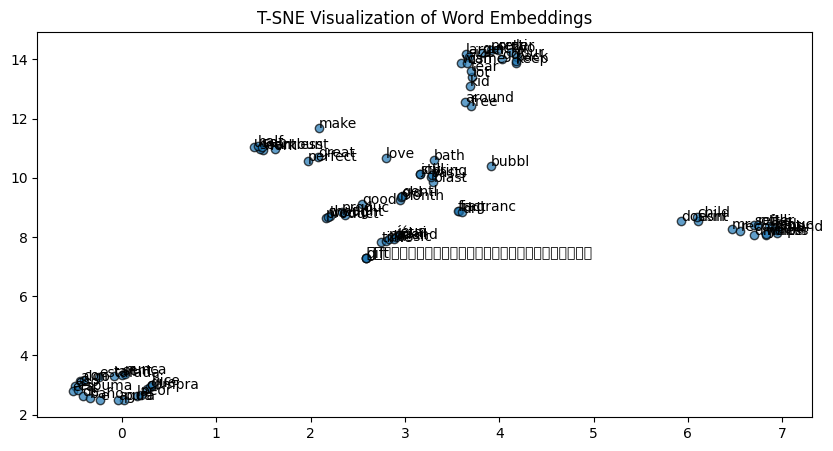

In [62]:
# (2) Visualize word embeddings with PCA and T-SNE
def plot_embeddings(model):
    words = list(model.wv.index_to_key)[:100]  # Selecting the first 100 words
    word_vectors = np.array([model.wv[word] for word in words])

    # PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(word_vectors)
    plt.figure(figsize=(10, 5))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], edgecolors='k', alpha=0.7)
    for i, word in enumerate(words):
        plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]))
    plt.title("PCA Visualization of Word Embeddings")
    plt.show()

    # T-SNE
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    tsne_result = tsne.fit_transform(word_vectors)
    plt.figure(figsize=(10, 5))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], edgecolors='k', alpha=0.7)
    for i, word in enumerate(words):
        plt.annotate(word, (tsne_result[i, 0], tsne_result[i, 1]))
    plt.title("T-SNE Visualization of Word Embeddings")
    plt.show()

plot_embeddings(model)

In [63]:
# (3) Compute cosine similarity between words
def compute_cosine_similarity(word1, word2, model):
    if word1 in model.wv and word2 in model.wv:
        return 1 - cosine(model.wv[word1], model.wv[word2])
    else:
        return None

word_pairs = [("bubbl", "bath"), ("gentl", "skin"), ("fragranc", "skin")]
for w1, w2 in word_pairs:
    similarity = compute_cosine_similarity(w1, w2, model)
    print(f"Cosine Similarity between '{w1}' and '{w2}': {similarity}")

Cosine Similarity between 'bubbl' and 'bath': 0.9488595564363188
Cosine Similarity between 'gentl' and 'skin': 0.8149461585802069
Cosine Similarity between 'fragranc' and 'skin': 0.9089811130761922


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.




1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)
2.  Explain your labeling Schema you have used and mention those labels

3.  You can take AI assistance for labeling the data only.



In [ ]:
# The GitHub link of your final csv file
# Link:https://github.com/LGChalla/Laxmigayathri_INFO5731_Spring2025/blob/main/Annotated%20amazon%20reviews.csv

In [ ]:
#I should redo the webscraping again, the reviews got repeated
#I believe this dataset is best suited for Sentiment Analysis and Text Classification.
#Labeling Schema Used:
#Positive (1): Reviews expressing satisfaction
#Negative (-1): Reviews expressing dissatisfaction
#Neutral (0): Reviews with no strong sentiment [Gave a zero for other language reviews too]


# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer Overall, I could grasp and go through the N-gram, TF-IDF and the word embedded models well. The provided time was comfortable enough to go through all the sections.